In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import sys
from yacs.config import CfgNode as CN
import os
from PIL import Image 
import torch
from torch.utils.data import Dataset
from torchvision import transforms, datasets
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms
#from cityscapesscripts.helpers.labels import trainId2label as t2l
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from einops import rearrange
import shutil
import time
import tqdm
from csv import reader
from functools import reduce
import torchvision
import torch._utils
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import numpy as np
import math
from torchvision import models
import progressbar
from time import sleep
from pathlib import Path
import csv
import itertools
import random
import gc
import statistics
import pandas as pd
import logging
import functools
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [1]:
ROOT_DIR = '/home/sourajit/DeepLearningProjects/data/cityscapes'
IMG_HEIGHT = 512  
IMG_WIDTH = 1024
ORIGINAL_IMG_HEIGHT = 1024  
ORIGINAL_IMG_WIDTH = 2048
BATCH_SIZE = 4
LEARNING_RATE = 0.0005
EPOCHS = 10
GLOBAL_EPOCH_COUNTER = 0
MAX_ITER = 3000000
NUM_WORKERS = 0
NUM_CLASSES = 19
ignore_label = 255
BatchNorm2d = nn.BatchNorm2d
BN_MOMENTUM = 0.01
ALIGN_CORNERS = True
logger = logging.getLogger(__name__)
device_rtx3090 = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device_rtx3070 = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

NameError: ignored

In [ ]:
BatchNorm2d = nn.BatchNorm2d
BN_MOMENTUM = 0.01
ALIGN_CORNERS = True
logger = logging.getLogger(__name__)

In [ ]:
def checker(filename):
    filename = str(filename)
    data_type = None
    if (filename == 'None'):
        data_type = 'Train Set'
    elif (filename.startswith("['/frankfurt") or
         filename.startswith("['/lindau") or
         filename.startswith("['/munster")):
        data_type = 'Val Set'
    else:
        data_type = 'Test Set'
    return data_type

In [ ]:
def print_msg1(data_type, elapsed):
    empty = '     '
    msg = empty+'>>>  IOU evaluated on '+ data_type + ' in ' + f'{elapsed:5.5f}' + ' seconds'+empty
    print ('='*len(msg))
    print (msg)
    print ('='*len(msg))
    return

In [ ]:
def print_msg2(data_type, elapsed):
    empty = '     '
    msg = empty+'>>>  Predictions saved & IOU evaluated on '+ data_type + ' in ' + f'{elapsed:5.5f}' + ' seconds'+empty
    print ('='*len(msg))
    print (msg)
    print ('='*len(msg))
    return

In [ ]:
def print_msg3(data_type, elapsed):
    empty = '     '
    msg = empty+'>>>  Predictions saved on '+ data_type + ' in ' + f'{elapsed:5.5f}' + ' seconds'+empty
    print ('='*len(msg))
    print (msg)
    print ('='*len(msg))
    return

In [ ]:
def save_as_images(tensor_pred, folder, image_name):
    tensor_pred = transforms.ToPILImage()(255*tensor_pred[0].type(torch.FloatTensor))
    filename = f"{folder}/{image_name}.png"
    tensor_pred.save(filename)

In [ ]:
def Average(lst):
    return reduce(lambda a, b: a + b, lst) / len(lst)

In [ ]:
color_mapping_before_conversion = {
     0 : (  0,  0,  0),
     1 : (  0,  0,  0),
     2 : (  0,  0,  0),
     3 : (  0,  0,  0),
     4 : (  0,  0,  0),
     5 : (111, 74,  0),
     6 : ( 81,  0, 81),
     7 : (128, 64,128),
     8 : (244, 35,232),
     9 : (250,170,160),
    10 : (230,150,140),
    11 : ( 70, 70, 70),
    12 : (102,102,156),
    13 : (190,153,153),
    14 : (180,165,180),
    15 : (150,100,100),
    16 : (150,120, 90),
    17 : (153,153,153),
    18 : (153,153,153),
    19 : (250,170, 30),
    20 : (220,220,  0),
    21 : (107,142, 35),
    22 : (152,251,152),
    23 : ( 70,130,180),
    24 : (220, 20, 60),
    25 : (255,  0,  0),
    26 : (  0,  0,142),
    27 : (  0,  0, 70),
    28 : (  0, 60,100),
    29 : (  0,  0, 90),
    30 : (  0,  0,110),
    31 : (  0, 80,100),
    32 : (  0,  0,230),
    33 : (119, 11, 32),
    -1 : (  0,  0,142)
}

In [ ]:
color_mapping_after_conversion = {
     255 : (  0,  0,  0),
     0 : (128, 64,128),
     1 : (244, 35,232),
     2 : ( 70, 70, 70),
     3 : (102,102,156),
     4 : (190,153,153),
     5 : (153,153,153),
     6 : (250,170, 30),
     7 : (220,220,  0),
     8 : (107,142, 35),
     9 : (152,251,152),
    10 : ( 70,130,180),
    11 : (220, 20, 60),
    12 : (255,  0,  0),
    13 : (  0,  0,142),
    14 : (  0,  0, 70),
    15 : (  0, 60,100),
    16 : (  0, 80,100),
    17 : (  0,  0,230),
    18 : (119, 11, 32)
}

In [ ]:
id2class_after_conversion = {
     255 : "unlabeled",
     0 : "road",
     1 : "sidewalk",
     2 : "building",
     3 : "wall",
     4 : "fence",
     5 : "pole",
     6 : "traffic light",
     7 : "traffic sign",
     8 : "vegetation",
     9 : "terrain",
    10 : "sky",
    11 : "preson",
    12 : "rider",
    13 : "car",
    14 : "truck",
    15 : "bus",
    16 : "train",
    17 : "motorcycle",
    18 : "bicycle"
}

In [ ]:
def label2color(label, color_array):
    temp = label.clone()
    label1 = label.clone()
    label2 = label.clone()
    label3 = label.clone()
    #print (label.dtype, temp.dtype, label1.dtype, label2.dtype, label3.dtype)
    for k, v in color_array.items():
        label1[temp == k] = v[0]
        label2[temp == k] = v[1]
        label3[temp == k] = v[2]
    #print (label1.shape, label2.shape, label3.shape)
    label1 = rearrange(label1, 'd0 d1 d2 -> d0 1 d1 d2')
    label2 = rearrange(label2, 'd0 d1 d2 -> d0 1 d1 d2')
    label3 = rearrange(label3, 'd0 d1 d2 -> d0 1 d1 d2')
    #print (label1.shape, label2.shape, label3.shape)
    ret = torch.stack((label1, label2, label3), 1)
    ret = rearrange(ret, 'd0 d1 d2 d3 d4-> d0 (d1 d2) d3 d4')
    return ret

In [ ]:
label_mapping = {-1: 255, 0: 255, 
                  1: 255, 2: 255, 
                  3: 255, 4: 255, 
                  5: 255, 6: 255, 
                  7: 0, 8: 1, 9: 255, 
                  10: 255, 11: 2, 12: 3, 
                  13: 4, 14: 255, 15: 255, 
                  16: 255, 17: 5, 18: 255, 
                  19: 6, 20: 7, 21: 8, 22: 9, 23: 10, 24: 11,
                  25: 12, 26: 13, 27: 14, 28: 15, 
                  29: 255, 30: 255, 
                  31: 16, 32: 17, 33: 18}
class_weights = torch.tensor([0.8373, 0.918, 0.866, 1.0345, 
                              1.0166, 0.9969, 0.9754, 1.0489,
                              0.8786, 1.0023, 0.9539, 0.9843, 
                              1.1116, 0.9037, 1.0865, 1.0955, 
                              1.0865, 1.1529, 1.0507],
                             dtype=torch.float32, 
                             device=device_rtx3090)
no_class_weights = torch.tensor([0.98, 1.0, 1.0, 1.0, 
                                 1.0, 1.0, 1.0, 1.0,
                                 1.0, 1.0, 1.0, 1.0,
                                 1.0, 1.0, 1.0, 1.0,
                                 1.0, 1.0, 1.0],
                                dtype=torch.float32, 
                                device=device_rtx3090)

In [ ]:
def refine_label(label):
    label[label < -1] = 0
    label[label > 33] = 0
    return label

In [ ]:
def convert_label(label, inverse=False):
    #temp = label.clone()
    if inverse:
        for v, k in label_mapping.items():
            label[label == k] = v
    else:
        for k, v in label_mapping.items():
            label[label == k] = v
        label[label < 0] = 255
        label[label > 18] = 255
    return label

In [ ]:
def refine_label_after_loader(label):
    label[label < 0] = 255
    label[label > 18] = 255
    return label

In [ ]:
class CityscapesDataset(Dataset):
    def __init__(self, split, root_dir, relabelled=True, target_type='semantic', mode='fine', transform=None, eval=False):
        self.transform = transform
        if mode == 'fine':
            self.mode = 'gtFine'
        elif mode == 'coarse':
            self.mode = 'gtCoarse'
        self.split = split
        self.yLabel_list = []
        self.XImg_list = []
        self.eval = eval 
        self.label_path = os.path.join(os.getcwd(), root_dir+'/'+self.mode+'/'+self.split)
        self.rgb_path = os.path.join(os.getcwd(), root_dir+'/leftImg8bit/'+self.split)
        city_list = os.listdir(self.label_path)
        for city in city_list:
            self.XImg_list.extend(
                ['/'+city+'/'+path for path in os.listdir(self.rgb_path+'/'+city)]
            )
        for i in range(len(self.XImg_list)):
            self.yLabel_list.append(self.XImg_list[i][:-15]+"gtFine_labelIds.png")
    
    def __len__(self):
        length = len(self.XImg_list)
        return length
      
    def __getitem__(self, index):
        image = Image.open(self.rgb_path+self.XImg_list[index])
        y = Image.open(self.label_path+self.yLabel_list[index])

        if self.transform is not None:
            image = self.transform(image)
            y = self.transform(y)

        image = transforms.ToTensor()(image)
        y = np.array(y)
        y = torch.from_numpy(y)
        
        y = y.type(torch.LongTensor)
        y = refine_label(y)
        y_converted = convert_label(y)
        if self.eval:
            return image, y_converted, self.XImg_list[index]
        else:
            return image, y_converted

In [ ]:
def get_cityscapes_data(
    mode,
    split,
    relabelled=True,
    root_dir=ROOT_DIR,
    target_type="semantic",
    transforms=None,
    batch_size=1,
    eval=False,
    shuffle=True,
    pin_memory=True):
    data = CityscapesDataset(
        mode=mode, split=split, target_type=target_type, relabelled=relabelled, transform=transforms, root_dir=root_dir, eval=eval)

    data_loaded = torch.utils.data.DataLoader(
        data, batch_size=batch_size, shuffle=shuffle, pin_memory=pin_memory, num_workers=NUM_WORKERS)

    return data_loaded

In [ ]:
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH))
])

In [ ]:
train_set = get_cityscapes_data(
    split='train',
    mode='fine',
    relabelled=True,
    root_dir=ROOT_DIR,
    transforms=transform,
    batch_size=BATCH_SIZE
)

In [ ]:
val_set = get_cityscapes_data(
    split='val',
    mode='fine',
    relabelled=True,
    root_dir=ROOT_DIR,
    shuffle=False,
    transforms=None,
    batch_size=1,
    eval=True
)

In [ ]:
test_set = get_cityscapes_data(
    split='test',
    mode='fine',
    relabelled=True,
    root_dir=ROOT_DIR,
    shuffle=False,
    transforms=None,
    batch_size=1,
    eval=True
)

744
torch.Size([4, 3, 512, 1024]) torch.float32 torch.Size([4, 512, 1024]) torch.int64


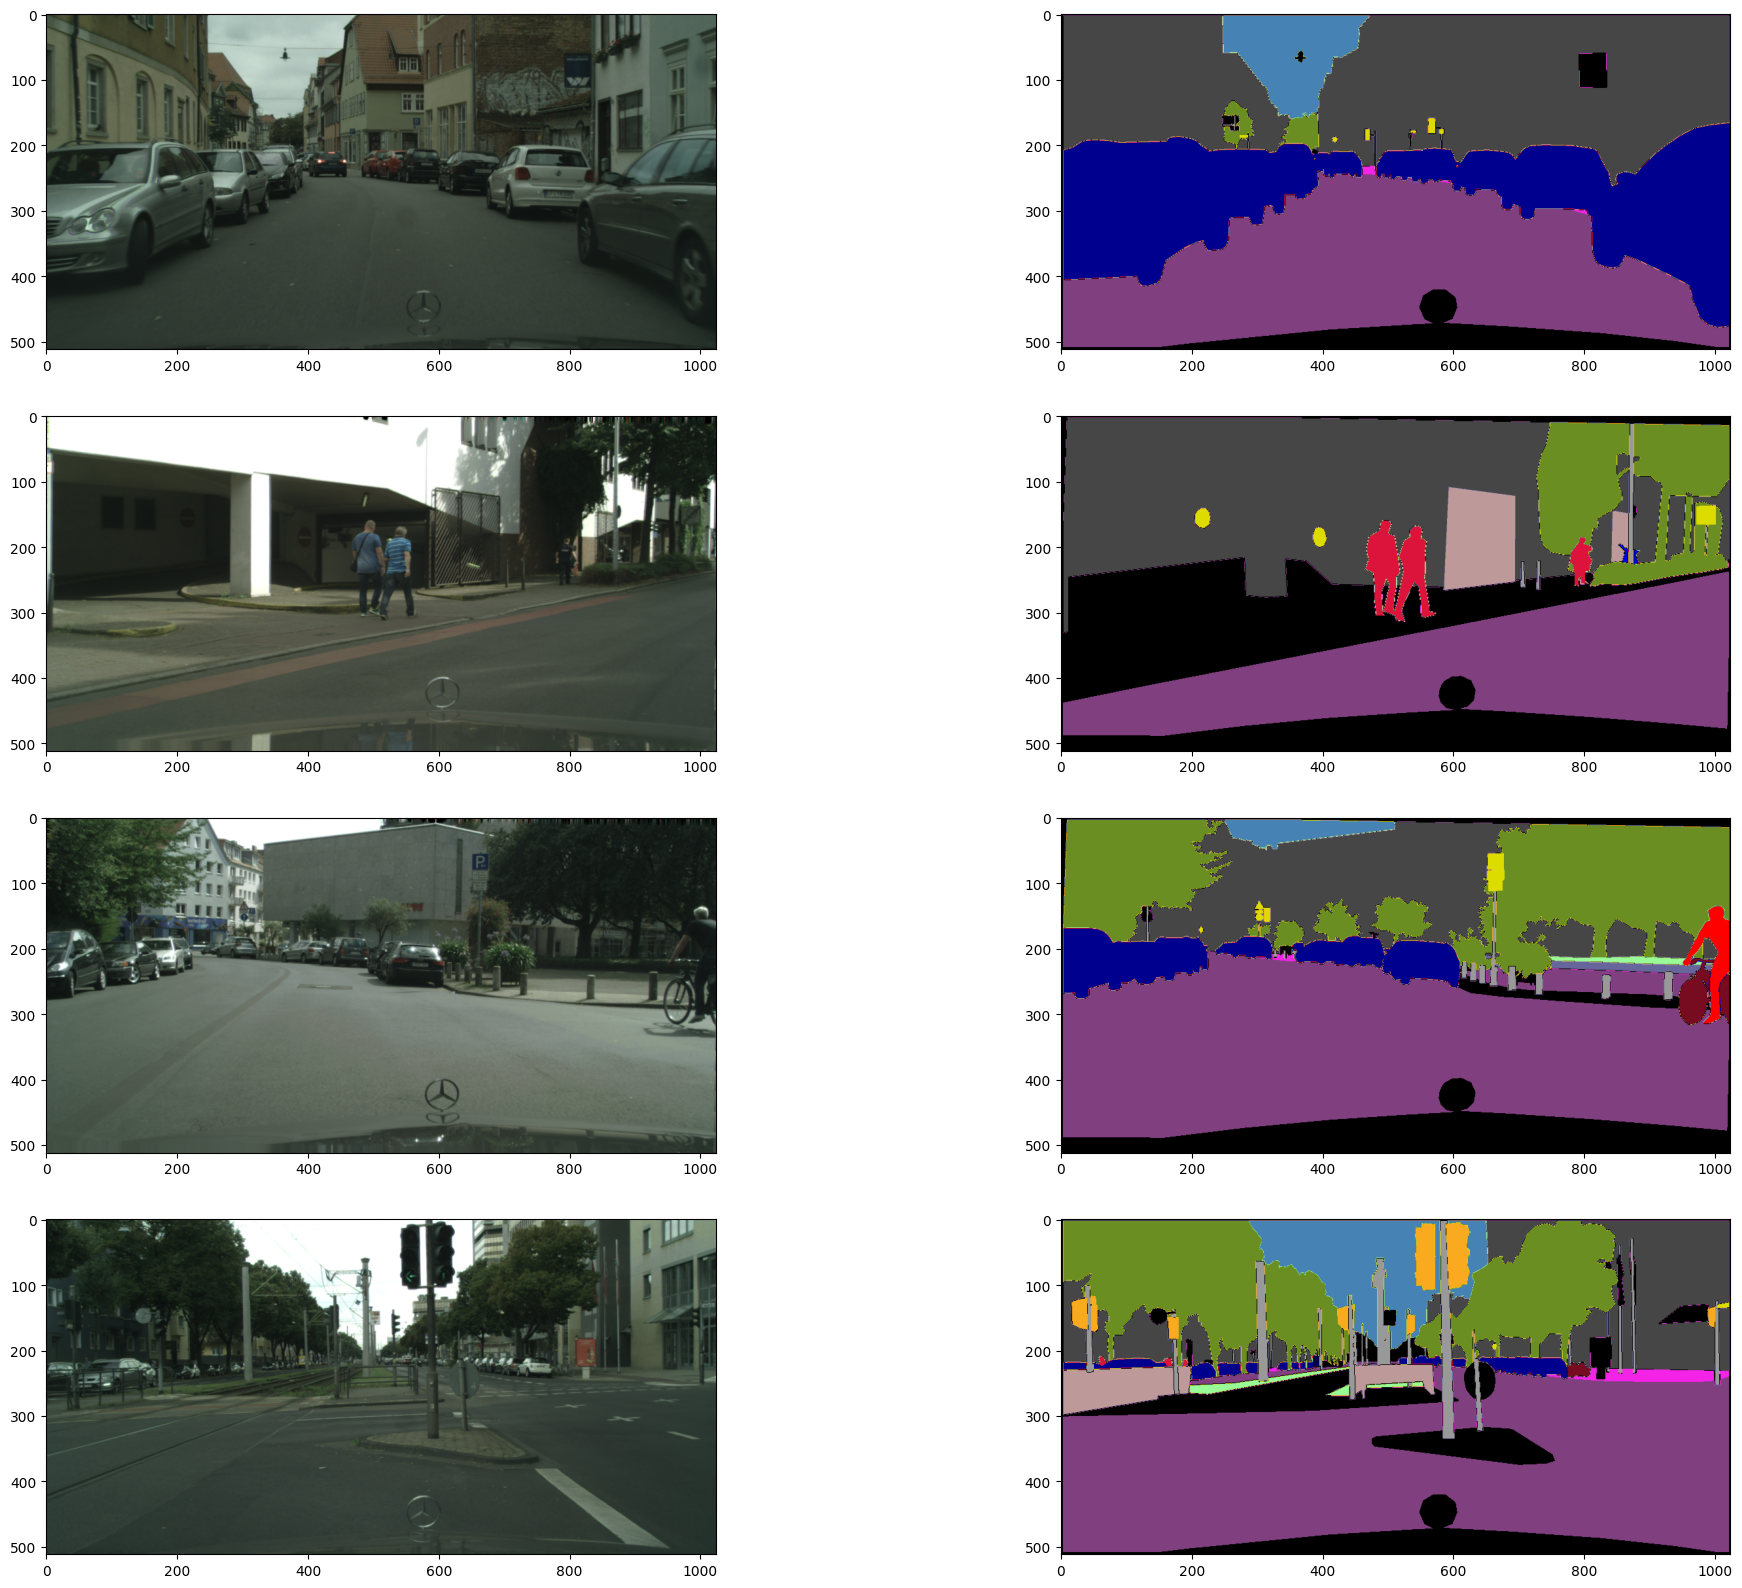

In [ ]:

print (len(train_set))
examples = next(iter(train_set))
inputs, labels = examples
print (inputs.shape, inputs.dtype, labels.shape, labels.dtype)
color_labels = label2color(labels, color_mapping_after_conversion)

fig,ax=plt.subplots(ncols=2,nrows=BATCH_SIZE,figsize=(24,5*BATCH_SIZE))
for current_batch in range(BATCH_SIZE):    
    ax[current_batch][0].imshow(transforms.ToPILImage()(inputs[current_batch].type(torch.FloatTensor)))
    ax[current_batch][1].imshow(transforms.ToPILImage()(255*color_labels[current_batch].type(torch.FloatTensor)))
